### Lab Results

Dataset Information: The results of patient's lab tests

This table contains all patients information (inpatient + ed + outpatient)

**features**

count: number of lab tests

*Age bins*: number of lab tests within this age range

age_mean: the mean test age for each patient

age_std: the std of the test age for each patient

freq: the frequency of lab tests per year

## Prev dataset

In [12]:
import pandas as pd
import os
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import math

datatype = "quality"

In [13]:
if datatype == "train": dataset_path = '/home/bhatti/dataset/VCHAMPS/lab_results_train.csv'
if datatype == "test": dataset_path = '/data/public/MLA/VCHAMPS-Test/lab_results_test.csv'
if datatype == "quality": dataset_path = '/data/public/MLA/VCHAMPS-Quality/lab_results_qual.csv'
lab = pd.read_csv(dataset_path, index_col=0, usecols=["Internalpatientid", "Age at lab test"])

In [14]:
lab = lab.reset_index()
lab

,Internalpatientid,Age at lab test
0,100012,53.085902
1,100012,53.085902
2,100012,53.085902
3,100012,53.085902
4,100012,53.085902
...,...,...
1970526,51551,60.910378
1970527,51551,60.910378
1970528,51551,60.910378
1970529,51551,60.914041


In [15]:
if datatype == "train": dataset_path = '/home/bhatti/dataset/VCHAMPS/inpatient_admissions_train.csv'
if datatype == "test": dataset_path = '/data/public/MLA/VCHAMPS-Test/inpatient_admissions_test.csv'
if datatype == "quality": dataset_path = '/data/public/MLA/VCHAMPS-Quality/inpatient_admissions_qual_Formatfixed.csv'
in_ad = pd.read_csv(dataset_path,index_col=0)

In [16]:
print(len(list(set(lab["Internalpatientid"].unique()) - set(in_ad["Internalpatientid"].unique()))))
print(len(list(set(in_ad["Internalpatientid"].unique()) - set(lab["Internalpatientid"].unique()))))

352
1


### Get the frequency and count

In [17]:
lab_results_features = []
for ids, group in tqdm(lab.groupby("Internalpatientid")):
    count = group["Age at lab test"].astype(str).apply(lambda x: x[:7]).nunique()
    
    min_age = group["Age at lab test"].min()
    max_age = group["Age at lab test"].max()

    freq = count/(math.floor(max_age - min_age) + 1)

    age_mean = group["Age at lab test"].mean()
    age_std = group["Age at lab test"].std()
    if group["Age at lab test"].nunique() == 1: age_std = 0

    df = pd.DataFrame(data={'Internalpatientid': [ids], 'lab_count': [count], 'lab_freq': [round(freq,2)],
                            "lab_age_mean": age_mean, "lab_age_std": age_std})
    
    df = df.reset_index(drop=True)
    lab_results_features.append(df)
    
lab_results_features = pd.concat(lab_results_features)

  0%|          | 0/983 [00:00<?, ?it/s]

In [18]:
lab_results_features

,Internalpatientid,lab_count,lab_freq,lab_age_mean,lab_age_std
0,67,41,3.73,52.839098,2.984112
0,200,255,11.59,77.842169,5.340512
0,291,291,72.75,82.075826,1.268829
0,330,224,9.74,67.777557,5.561204
0,351,102,51.00,85.081594,0.454984
...,...,...,...,...,...
0,167907,10,0.91,81.460528,4.180655
0,167917,60,6.00,45.423213,2.501545
0,168008,167,33.40,71.735905,1.533223
0,168496,12,0.60,87.873199,6.635271


In [19]:
if datatype == "train": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/lab_results_features.csv")
if datatype == "test": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/lab_results_features_test.csv")
if datatype == "quality": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/lab_results_features_quality.csv")

--- 
EDA

In [ ]:
lab_results_features = pd.read_csv("/home/hassan/lily/MLA/FDA/lab_results_features.csv",index_col=0)

In [ ]:
ad = pd.read_csv("inpatient_admission_complete.csv",index_col=0)

In [ ]:
died_id = np.array(ad[ad['Died during admission'] == 1]['Internalpatientid'])
alive_id = np.array(ad[ad['Died during admission'] == 0]['Internalpatientid'])
readmitted_id = np.array(ad[ad['Readmission'] == 1]['Internalpatientid'])
noreadmitted_id = np.array(ad[ad['Readmission'] == 0]['Internalpatientid'])

Text(0.5, 1.0, 'Relationship of number of lab results with mortality')

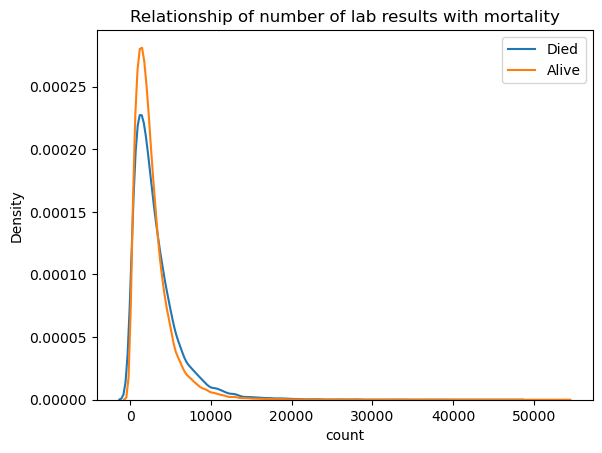

In [ ]:
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(died_id)]["count"], label="Died")
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(alive_id)]["count"], label = "Alive")
plt.legend()
plt.title("Relationship of number of lab results with mortality")

Text(0.5, 1.0, 'Relationship of number of lab results with Readmission')

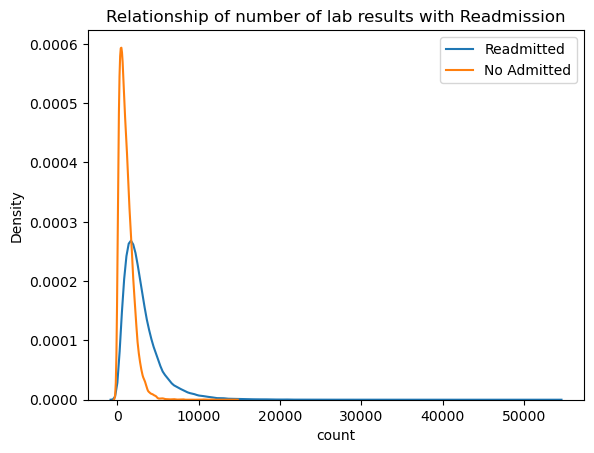

In [ ]:
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(readmitted_id)]["count"], label="Readmitted")
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(noreadmitted_id)]["count"], label = "No Admitted")
plt.legend()
plt.title("Relationship of number of lab results with Readmission")

Text(0.5, 1.0, 'Relationship of frequency of lab results with mortality')

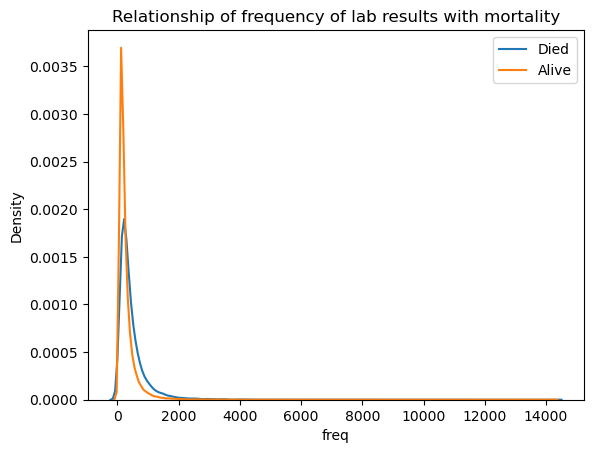

In [ ]:
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(died_id)]["freq"], label="Died")
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(alive_id)]["freq"], label = "Alive")
plt.legend()
plt.title("Relationship of frequency of lab results with mortality")

Text(0.5, 1.0, 'Relationship of frequency of lab results with Readmission')

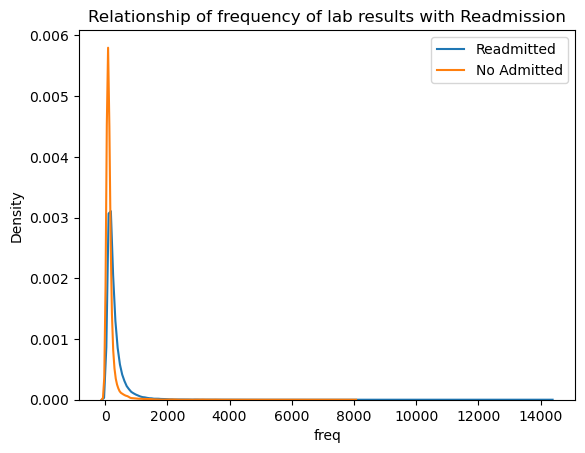

In [ ]:
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(readmitted_id)]["freq"], label="Readmitted")
sns.kdeplot(lab_results_features[lab_results_features["Internalpatientid"].isin(noreadmitted_id)]["freq"], label = "No Admitted")
plt.legend()
plt.title("Relationship of frequency of lab results with Readmission")

<Axes: >

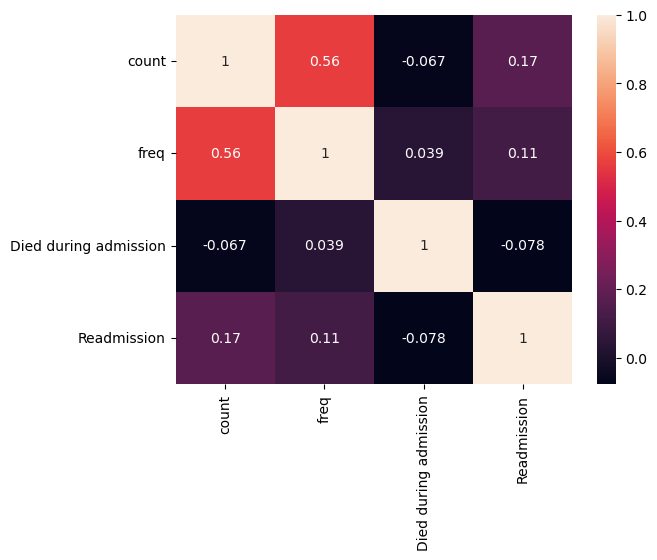

In [ ]:
joined = ad.join(num_results.set_index('Internalpatientid'), on='Internalpatientid')
#temp[temp["count"].isna()]
sns.heatmap(joined[["count", "freq", "Died during admission", "Readmission"]].corr(), annot=True, fmt='.2g')

There are null values, remeber to remove those

In [ ]:
len(joined[joined["count"].isna() | joined["freq"].isna()])

35

Number of lab results has some correlation between readmission

should be used as a covariate

## New dataset process (readmission)

In [ ]:
import pandas as pd
import os
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
datatype = "train"

In [ ]:
if datatype == "train":
    path = '/home/hassan/lily/MLA/FDA/inpatient_full_simple.csv'
elif datatype == "test":
    path = '/home/hassan/lily/MLA/FDA/inpatient_simple_test.csv'
else:
    path = '/home/hassan/lily/MLA/FDA/inpatient_simple_quality.csv'
    
inpatient = pd.read_csv(path).iloc[:,1:]
inpatient

,Internalpatientid,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_readmission,Died,AO,CVD,unique_admitting_specialty,...,stay_std,freq,Medical,Mental,Others_Specialty,Rehab,Gerontology,next_readmission_time,Discharge date,readmission within 300 days
0,7,5,44.40,3,0,0,0,1,0,4,...,11.420188,0.50,2,1,0,2,0,338.72,2013-04-18 14:41:31.0,0
1,9,4,10.70,2,0,0,0,0,0,3,...,1.485003,4.00,0,0,0,4,0,2.03,2000-04-10 02:38:04.0,1
2,12,5,21.54,1,0,3,0,1,1,2,...,3.648043,1.25,5,0,0,0,0,69.25,2004-04-07 03:40:16.0,1
3,17,12,46.45,2,0,4,0,0,1,4,...,3.078313,3.00,0,1,0,11,0,61.89,2004-05-05 15:18:05.0,1
4,22,2,4.53,2,1,0,0,0,0,2,...,1.831407,0.17,0,0,0,2,0,0.42,2014-05-07 15:43:10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22250,168995,2,1.79,2,0,0,0,0,0,2,...,0.106066,0.67,1,0,0,1,0,3876.37,2010-06-09 10:03:21.0,0
22251,169011,1,0.79,1,0,0,0,1,0,1,...,0.000000,1.00,1,0,0,0,0,3018.51,2004-07-15 15:11:27.0,0
22252,169037,2,12.76,2,0,0,0,0,0,1,...,0.650538,1.00,2,0,0,0,0,0.02,2015-02-12 00:48:40.0,1
22253,169059,1,8.91,1,0,0,0,0,0,1,...,0.000000,1.00,0,0,0,0,1,0.00,2003-03-11 12:21:08.0,0


In [ ]:
if datatype == "train":
    path = '/home/bhatti/dataset/VCHAMPS/lab_results_train.csv'
elif datatype == "test":
    path = '/data/public/MLA/VCHAMPS-Test/lab_results_test.csv'
else:
    path = '/data/public/MLA/VCHAMPS-Quality/lab_results_qual.csv'

lab = pd.read_csv(path, index_col=0, usecols = ["Internalpatientid", "Age at lab test", "Lab test date"])
lab = lab.reset_index()
lab["Age at lab test"] = lab["Age at lab test"].astype(str).apply(lambda x: x[:7])

In [ ]:
lab = lab.drop_duplicates()
lab

,Internalpatientid,Age at lab test,Lab test date
0,51658,85.0443,2012-02-26 16:49:42.0
5,51661,49.0640,2015-04-23 22:16:35.0
6,51661,49.0641,2015-04-23 22:28:57.0
7,51661,49.0794,2015-04-29 12:46:21.0
8,51661,49.0821,2015-04-30 12:48:39.0
...,...,...,...
32375485,135651,86.5793,2020-12-10 17:57:16.0
32375488,135651,86.6281,2020-12-28 14:07:44.0
32375511,135651,86.6356,2020-12-31 07:48:03.0
32375534,135651,86.6410,2021-01-02 07:24:38.0


In [ ]:
inpatient_combine = lab.merge(inpatient, how = 'left', on = 'Internalpatientid')
# inpatient_combine2 = inpatient_combine.loc[inpatient_combine['Lab test date'] <= inpatient_combine['Discharge date']]
# inpatient_combine2 

In [ ]:
inpatient_combine

,Internalpatientid,Age at lab test,Lab test date,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_readmission,Died,AO,...,stay_std,freq,Medical,Mental,Others_Specialty,Rehab,Gerontology,next_readmission_time,Discharge date,readmission within 300 days
0,51658,85.0443,2012-02-26 16:49:42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51661,49.0640,2015-04-23 22:16:35.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
2,51661,49.0641,2015-04-23 22:28:57.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
3,51661,49.0794,2015-04-29 12:46:21.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
4,51661,49.0821,2015-04-30 12:48:39.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574914,135651,86.5793,2020-12-10 17:57:16.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0
4574915,135651,86.6281,2020-12-28 14:07:44.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0
4574916,135651,86.6356,2020-12-31 07:48:03.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0
4574917,135651,86.6410,2021-01-02 07:24:38.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0


In [ ]:
inpatient_combine2 = inpatient_combine.loc[inpatient_combine['Lab test date'] <= inpatient_combine['Discharge date']]
inpatient_combine2 

,Internalpatientid,Age at lab test,Lab test date,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_readmission,Died,AO,...,stay_std,freq,Medical,Mental,Others_Specialty,Rehab,Gerontology,next_readmission_time,Discharge date,readmission within 300 days
1,51661,49.0640,2015-04-23 22:16:35.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
2,51661,49.0641,2015-04-23 22:28:57.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
3,51661,49.0794,2015-04-29 12:46:21.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
4,51661,49.0821,2015-04-30 12:48:39.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
5,51661,49.1057,2015-05-09 04:03:46.0,3.0,44.72,3.0,0.0,0.0,0.0,0.0,...,19.491961,0.43,1.0,0.0,0.0,0.0,2.0,45.41,2021-05-10 15:27:59.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574914,135651,86.5793,2020-12-10 17:57:16.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0
4574915,135651,86.6281,2020-12-28 14:07:44.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0
4574916,135651,86.6356,2020-12-31 07:48:03.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0
4574917,135651,86.6410,2021-01-02 07:24:38.0,5.0,22.50,3.0,0.0,0.0,0.0,0.0,...,2.781438,5.00,4.0,0.0,0.0,1.0,0.0,12.19,2021-01-07 16:58:35.0,1.0


In [ ]:
lab_results_features = []
for ids, group in tqdm(inpatient_combine2.groupby("Internalpatientid")):
    group["Age at lab test"] = group["Age at lab test"].astype(float)
    count = group["Age at lab test"].nunique()
    
    min_age = group["Age at lab test"].min()
    max_age = group["Age at lab test"].max()
    
    freq = count/(math.floor(max_age - min_age) + 1)

    age_mean = group["Age at lab test"].mean()
    age_std = group["Age at lab test"].std()
    if group["Age at lab test"].nunique() == 1: age_std = 0

    df = pd.DataFrame(data={'Internalpatientid': [ids], 'lab_count': [count], 'lab_freq': [round(freq,2)],
                            "lab_age_mean": age_mean, "lab_age_std": age_std})
    
    df = df.reset_index(drop=True)
    lab_results_features.append(df)
    
lab_results_features = pd.concat(lab_results_features)

  0%|          | 0/15982 [00:00<?, ?it/s]

In [ ]:
if datatype == "train": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/inpatient_lab_results.csv")
elif datatype == "test": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/inpatient_lab_results_test.csv")
else: lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/inpatient_lab_results_quality.csv")
lab_results_features

,Internalpatientid,lab_count,lab_freq,lab_age_mean,lab_age_std
0,7,296,18.50,59.955437,3.317207
0,12,68,13.60,71.872495,1.223830
0,17,22,5.50,80.694200,0.895575
0,53,81,16.20,61.784465,1.189792
0,59,309,17.17,66.798379,3.968803
...,...,...,...,...,...
0,168995,13,2.17,62.371638,2.081103
0,169011,4,1.33,59.590275,1.051347
0,169037,15,1.15,80.249383,3.981989
0,169059,3,3.00,79.777175,0.140376


## New dataset process (All-cause mortality)

In [27]:
import pandas as pd
import os
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [28]:
if datatype == "train":
    path = '/home/hassan/lily/MLA/FDA/outpatient_mortality.csv'
elif datatype == "test":
    path = '/home/hassan/lily/MLA/FDA/outpatient_mortality_test.csv'
else:
    path = '/home/hassan/lily/MLA/FDA/outpatient_mortality_quality.csv'
    
inpatient = pd.read_csv(path, index_col=0)
inpatient

,Internalpatientid,num_visits,CVD,last_visit_date,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,age_std,freq
0,67,313,0,2020-11-11 16:00:31.0,0,0,313,0,0,0,53.523105,3.128784,28.45
0,200,1872,1,2023-02-13 10:31:19.0,0,0,0,741,1131,0,80.476890,4.781990,81.39
0,291,234,0,2007-03-26 14:15:45.0,0,0,0,0,234,0,81.506487,1.264804,58.50
0,330,932,1,2024-03-01 00:19:37.0,0,0,51,881,0,0,69.622150,4.492263,40.52
0,351,773,1,2024-06-04 14:45:34.0,0,0,0,0,773,0,85.033989,0.541659,154.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,167907,181,0,2013-11-14 23:44:48.0,0,0,0,31,150,0,84.030741,3.355429,13.92
0,167917,442,1,2022-01-27 05:25:51.0,0,0,442,0,0,0,45.647418,2.660564,40.18
0,168008,776,1,2013-12-03 23:38:48.0,0,0,0,776,0,0,71.853738,1.572813,86.22
0,168496,151,1,2023-02-03 22:36:15.0,0,0,0,9,142,0,92.361910,6.061224,6.57


In [29]:
if datatype == "train":
    path = '/home/bhatti/dataset/VCHAMPS/lab_results_train.csv'
elif datatype == "test":
    path = '/data/public/MLA/VCHAMPS-Test/lab_results_test.csv'
else:
    path = '/data/public/MLA/VCHAMPS-Quality/lab_results_qual.csv'

lab = pd.read_csv(path, index_col=0, usecols = ["Internalpatientid", "Age at lab test", "Lab test date"])
lab = lab.reset_index()
lab["Age at lab test"] = lab["Age at lab test"].astype(str).apply(lambda x: x[:7])

In [30]:
lab = lab.drop_duplicates()
inpatient_combine = lab.merge(inpatient, how = 'left', on = 'Internalpatientid')
inpatient_combine2 = inpatient_combine.loc[inpatient_combine['Lab test date'] <= inpatient_combine['last_visit_date']]
inpatient_combine2 

,Internalpatientid,Age at lab test,Lab test date,num_visits,CVD,last_visit_date,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,age_std,freq
0,100012,53.0859,2002-08-01 21:31:49.0,1404,1,2024-02-12 11:34:10.0,0,0,1031,373,0,0,58.838063,6.550591,61.04
1,100012,53.8025,2003-04-20 20:01:15.0,1404,1,2024-02-12 11:34:10.0,0,0,1031,373,0,0,58.838063,6.550591,61.04
2,100012,55.2741,2004-10-09 16:52:06.0,1404,1,2024-02-12 11:34:10.0,0,0,1031,373,0,0,58.838063,6.550591,61.04
3,100012,55.3940,2004-11-22 12:41:10.0,1404,1,2024-02-12 11:34:10.0,0,0,1031,373,0,0,58.838063,6.550591,61.04
4,100012,55.9051,2005-05-28 08:07:28.0,1404,1,2024-02-12 11:34:10.0,0,0,1031,373,0,0,58.838063,6.550591,61.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288648,51551,60.9047,2015-07-28 16:50:10.0,531,1,2015-08-15 12:32:52.0,0,0,260,271,0,0,57.383793,3.939718,44.25
288649,51551,60.9077,2015-07-29 18:44:33.0,531,1,2015-08-15 12:32:52.0,0,0,260,271,0,0,57.383793,3.939718,44.25
288650,51551,60.9092,2015-07-30 07:46:49.0,531,1,2015-08-15 12:32:52.0,0,0,260,271,0,0,57.383793,3.939718,44.25
288651,51551,60.9103,2015-07-30 17:50:06.0,531,1,2015-08-15 12:32:52.0,0,0,260,271,0,0,57.383793,3.939718,44.25


In [31]:
lab_results_features = []
for ids, group in tqdm(inpatient_combine2.groupby("Internalpatientid")):
    group["Age at lab test"] = group["Age at lab test"].astype(float)
    count = group["Age at lab test"].nunique()
    
    min_age = group["Age at lab test"].min()
    max_age = group["Age at lab test"].max()
    
    freq = count/(math.floor(max_age - min_age) + 1)

    age_mean = group["Age at lab test"].mean()
    age_std = group["Age at lab test"].std()
    if group["Age at lab test"].nunique() == 1: age_std = 0

    df = pd.DataFrame(data={'Internalpatientid': [ids], 'lab_count': [count], 'lab_freq': [round(freq,2)],
                            "lab_age_mean": age_mean, "lab_age_std": age_std})
    
    df = df.reset_index(drop=True)
    lab_results_features.append(df)
    
lab_results_features = pd.concat(lab_results_features)

  0%|          | 0/983 [00:00<?, ?it/s]

In [32]:
if datatype == "train": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/lab_results_allcause_mortality.csv")
elif datatype == "test": lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/lab_results_allcause_mortality_test.csv")
else: lab_results_features.to_csv("/home/hassan/lily/MLA/FDA/lab_results_allcause_mortality_quality.csv")
lab_results_features

,Internalpatientid,lab_count,lab_freq,lab_age_mean,lab_age_std
0,67,41,3.73,52.601590,2.963822
0,200,255,11.59,78.351188,4.920841
0,291,291,72.75,82.348391,1.191165
0,330,224,9.74,68.476453,4.950045
0,351,102,51.00,85.088940,0.453117
...,...,...,...,...,...
0,167907,10,0.91,80.548113,4.202618
0,167917,60,6.00,45.146645,2.375770
0,168008,167,33.40,72.049028,1.506570
0,168496,12,0.60,89.631407,7.047480
